In [35]:
import pandas as pd
import scipy
import math
import scipy.stats as st
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns
import seaborn as sns
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
import seaborn as sns

In [18]:
bank = pd.read_csv('/Users/sima/Desktop/Springboard/Bank_churners/BankChurners.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [19]:
bank.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [20]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [21]:
bank['Income_Category'].replace('60𝐾−80K', '60_80', inplace=True )
bank['Income_Category']


0           $60K - $80K
1        Less than $40K
2          $80K - $120K
3        Less than $40K
4           $60K - $80K
              ...      
10122       $40K - $60K
10123       $40K - $60K
10124    Less than $40K
10125       $40K - $60K
10126    Less than $40K
Name: Income_Category, Length: 10127, dtype: object

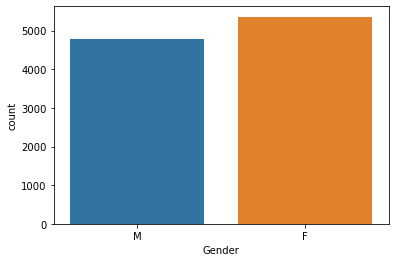

In [22]:
sns.countplot(x = 'Gender', data=bank)

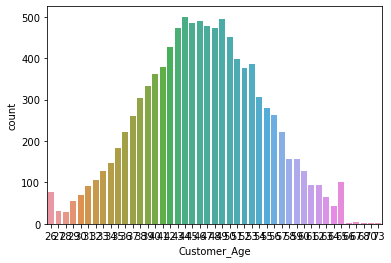

In [23]:
sns.countplot(x = 'Customer_Age', data=bank)

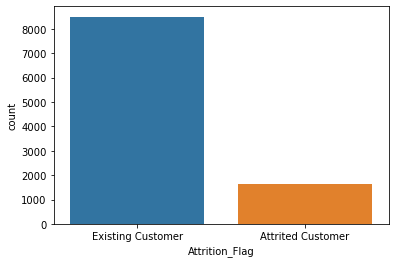

In [24]:
sns.countplot(x='Attrition_Flag', data=bank)

[Text(0, 0, 'Less than $40K'),
 Text(0, 0, '$40K - $60K'),
 Text(0, 0, '$60K - $80K'),
 Text(0, 0, '$80K - $120K'),
 Text(0, 0, '$120K +'),
 Text(0, 0, 'Unknown')]

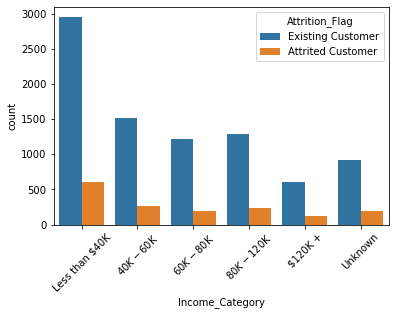

In [25]:
ax = sns.countplot(x ='Income_Category', data=bank, hue='Attrition_Flag', order= ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'Unknown'),
 Text(0, 0, 'Uneducated'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'College'),
 Text(0, 0, 'Post-Graduate'),
 Text(0, 0, 'Graduate')]

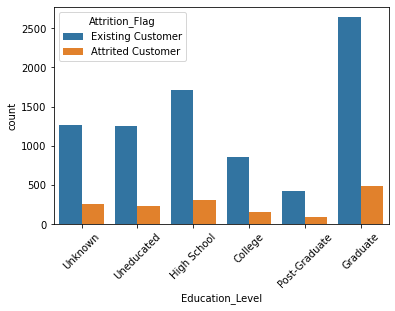

In [26]:
axx = sns.countplot(x= 'Education_Level', hue='Attrition_Flag', data=bank, order=['Unknown', 'Uneducated', 'High School', 'College', 'Post-Graduate', 'Graduate'])
axx.set_xticklabels(axx.get_xticklabels(),rotation=45)

In [27]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [28]:
X = bank.drop('Attrition_Flag', axis=1)
y= bank['Attrition_Flag']

category = ['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for i in category:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])
    
le = LabelEncoder()
y = le.fit_transform(y)
print(X)

       CLIENTNUM  Customer_Age  Gender  Dependent_count  Education_Level  \
0      768805383            45       1                3                3   
1      818770008            49       0                5                2   
2      713982108            51       1                3                2   
3      769911858            40       0                4                3   
4      709106358            40       1                3                5   
...          ...           ...     ...              ...              ...   
10122  772366833            50       1                2                2   
10123  710638233            41       1                2                6   
10124  716506083            44       0                1                3   
10125  717406983            30       1                2                2   
10126  714337233            43       0                2                2   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0             

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = reg.predict(X_test)
print(y_pred)

[ 0.99909556 -0.00215655  0.99950587 ... -0.00282189  0.99987096
  0.99950806]


In [33]:
print(reg.coef_)

[-3.89691366e-13  1.84031937e-06 -4.62580723e-06  8.08627933e-05
 -4.62855271e-06  4.40627685e-07 -1.06896201e-05 -3.10686506e-05
 -2.76000548e-06 -2.26540015e-05  3.89819253e-04  4.66151444e-04
  2.77138280e-08 -7.66595966e-09 -2.93182826e-08 -2.14263097e-04
  1.92682920e-09  1.23841019e-06  4.08765862e-05 -2.51875807e-05
  3.17924460e+00  4.18503379e+00]


In [34]:
print(reg.intercept_)

-3.1865455207046187


In [36]:
r2_score(y_test, y_pred)

0.9999859340272057

In [30]:
bank = bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],  axis= 1 )

In [ ]:
bank.corr()

In [ ]:
sns.pairplot(bank)

In [ ]:
plt.figure(figsize = (40, 40))
sns.heatmap(bank.corr(), annot=True)